<a href="https://colab.research.google.com/github/guilhermelaviola/IMDbMovieListAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Setting the search parameters:
filename = 'imdb.xlsx'
search_path = '/content/drive/My Drive/Datasets/Movies'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

# **Basic information of the dataset**

In [4]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile(file)
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status
530,2022-04-08,Gone with the Wind,Movie,8.2,238.0,1939,"Drama, Romance, War",334371,1939-12-15 00:00:00,"Sam Wood, George Cukor, Victor Fleming",Not classified
531,2022-02-18,The Greatest Story Ever Told,Movie,6.6,260.0,1965,"Biography, Drama, History",11934,1965-02-15 00:00:00,"George Stevens, Jean Negulesco",To watch with mom
532,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom
533,2022-09-15,Novecento,Movie,7.6,317.0,1976,"Drama, History",27289,1976-05-21 00:00:00,Bernardo Bertolucci,To watch with mom
534,2024-09-17,Alto Knights,Movie,NaN,NaN,2024,"Biography, Crime, Drama, History",0,2025-03-21 00:00:00,Barry Levinson,NaN


In [5]:
# Displaying the number of rows and columns in the dataset:
wl.shape

(535, 11)

In [6]:
# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         535 non-null    datetime64[ns]
 1   Title           535 non-null    object        
 2   Title Type      535 non-null    object        
 3   IMDb Rating     531 non-null    float64       
 4   Runtime (mins)  534 non-null    float64       
 5   Year            535 non-null    int64         
 6   Genres          535 non-null    object        
 7   Num Votes       535 non-null    int64         
 8   Release Date    535 non-null    object        
 9   Directors       531 non-null    object        
 10  Status          518 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 46.1+ KB


In [7]:
# Displaying statistical data of the numerical data present in the dataset:
wl.describe()

,Created,IMDb Rating,Runtime (mins),Year,Num Votes
count,535,531.000000,534.000000,535.000000,5.350000e+02
mean,2022-08-23 05:41:49.906542080,6.664595,114.353933,1989.257944,8.529204e+04
min,2020-04-29 00:00:00,0.000000,71.000000,1927.000000,0.000000e+00
25%,2021-11-06 12:00:00,6.200000,99.000000,1980.000000,4.255500e+03
50%,2022-06-25 00:00:00,6.700000,109.000000,1991.000000,1.836600e+04
75%,2023-04-28 00:00:00,7.200000,119.750000,1999.000000,6.813700e+04
max,2024-10-09 00:00:00,9.000000,317.000000,2024.000000,2.871665e+06
std,NaN,0.851452,27.181073,16.783731,2.258509e+05


# **Basic column data plotting**

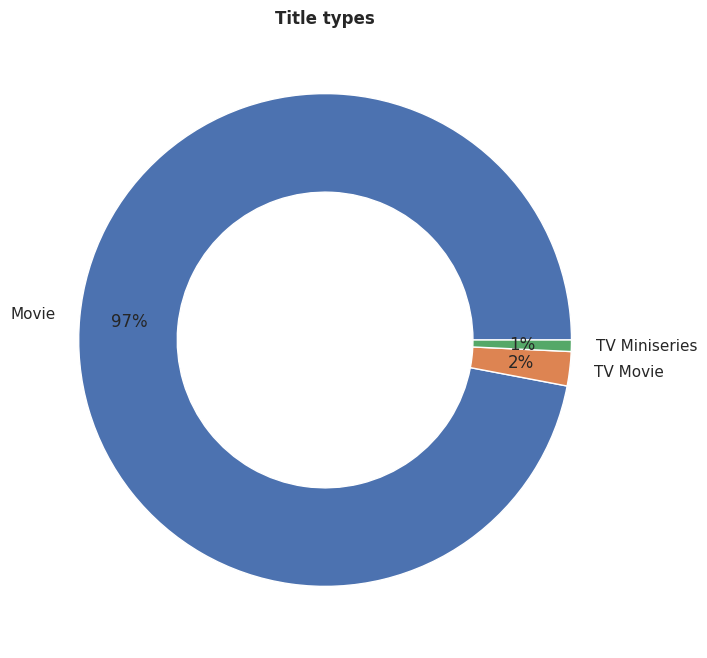

In [8]:
# Displaying the title types present in the dataset:
wl['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

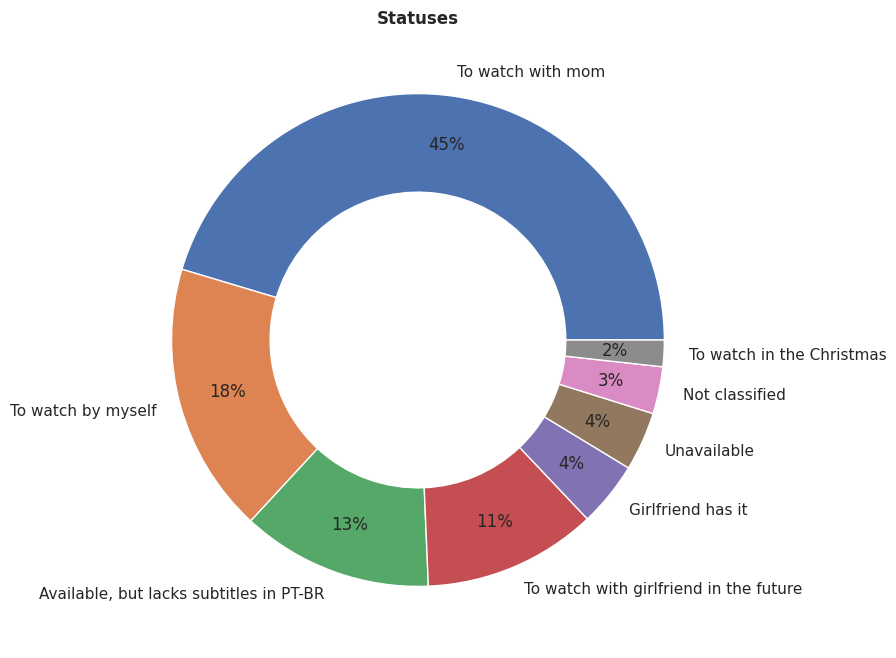

In [9]:
# Displaying the statuses present in the dataset:
wl['Status'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Statuses', fontweight = 'bold')
plt.show()

In [10]:
# Creating a datetime object based on the dates from the dataset:
wl['Created'] = wl['Created'].map(pd.to_datetime)
wl['Day Created'] = wl['Created'].apply(lambda x : x.day)
wl['Month Created'] = wl['Created'].apply(lambda x : x.month)
wl['Year Created'] = wl['Created'].apply(lambda x : x.year)
wl['Weekday Created'] = wl['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          535 non-null    datetime64[ns]
 1   Title            535 non-null    object        
 2   Title Type       535 non-null    object        
 3   IMDb Rating      531 non-null    float64       
 4   Runtime (mins)   534 non-null    float64       
 5   Year             535 non-null    int64         
 6   Genres           535 non-null    object        
 7   Num Votes        535 non-null    int64         
 8   Release Date     535 non-null    object        
 9   Directors        531 non-null    object        
 10  Status           518 non-null    object        
 11  Day Created      535 non-null    int64         
 12  Month Created    535 non-null    int64         
 13  Year Created     535 non-null    int64         
 14  Weekday Created  535 non-null    int64    

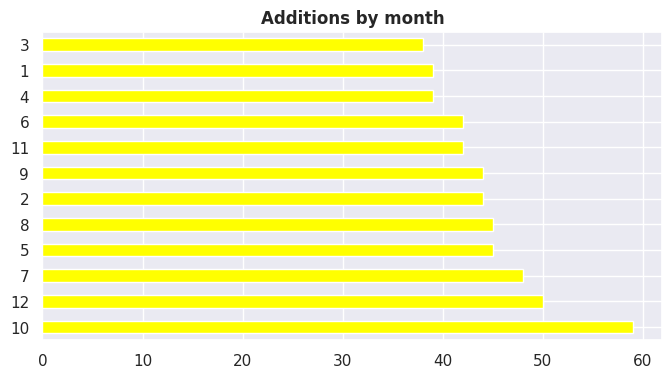

In [11]:
# Displaying the months with most and less additions:
wl['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

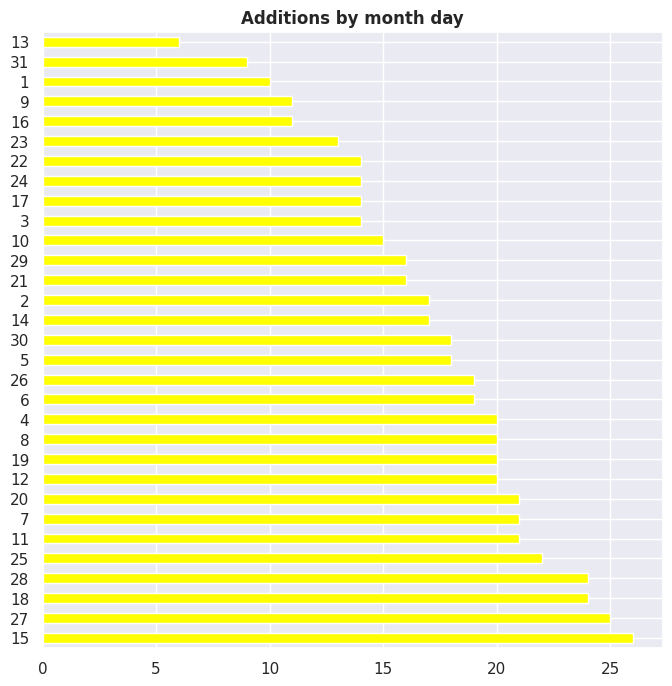

In [12]:
# Displaying the month days with most and less additions:
wl['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

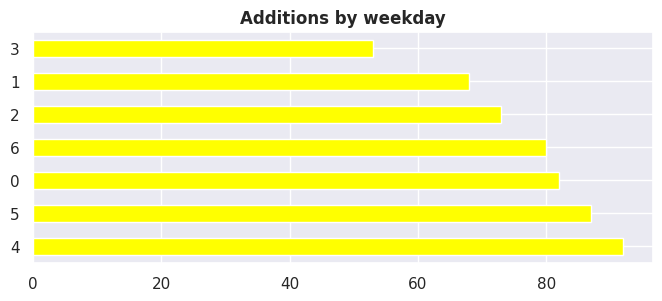

In [13]:
# Displaying the weekdays with most and less additions:
wl['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 3))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

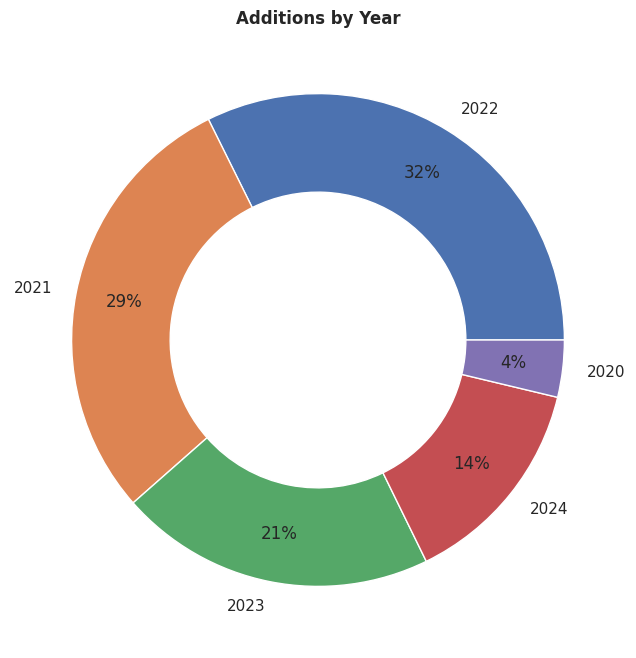

In [14]:
# Displaying the years with most and less additions:
wl['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

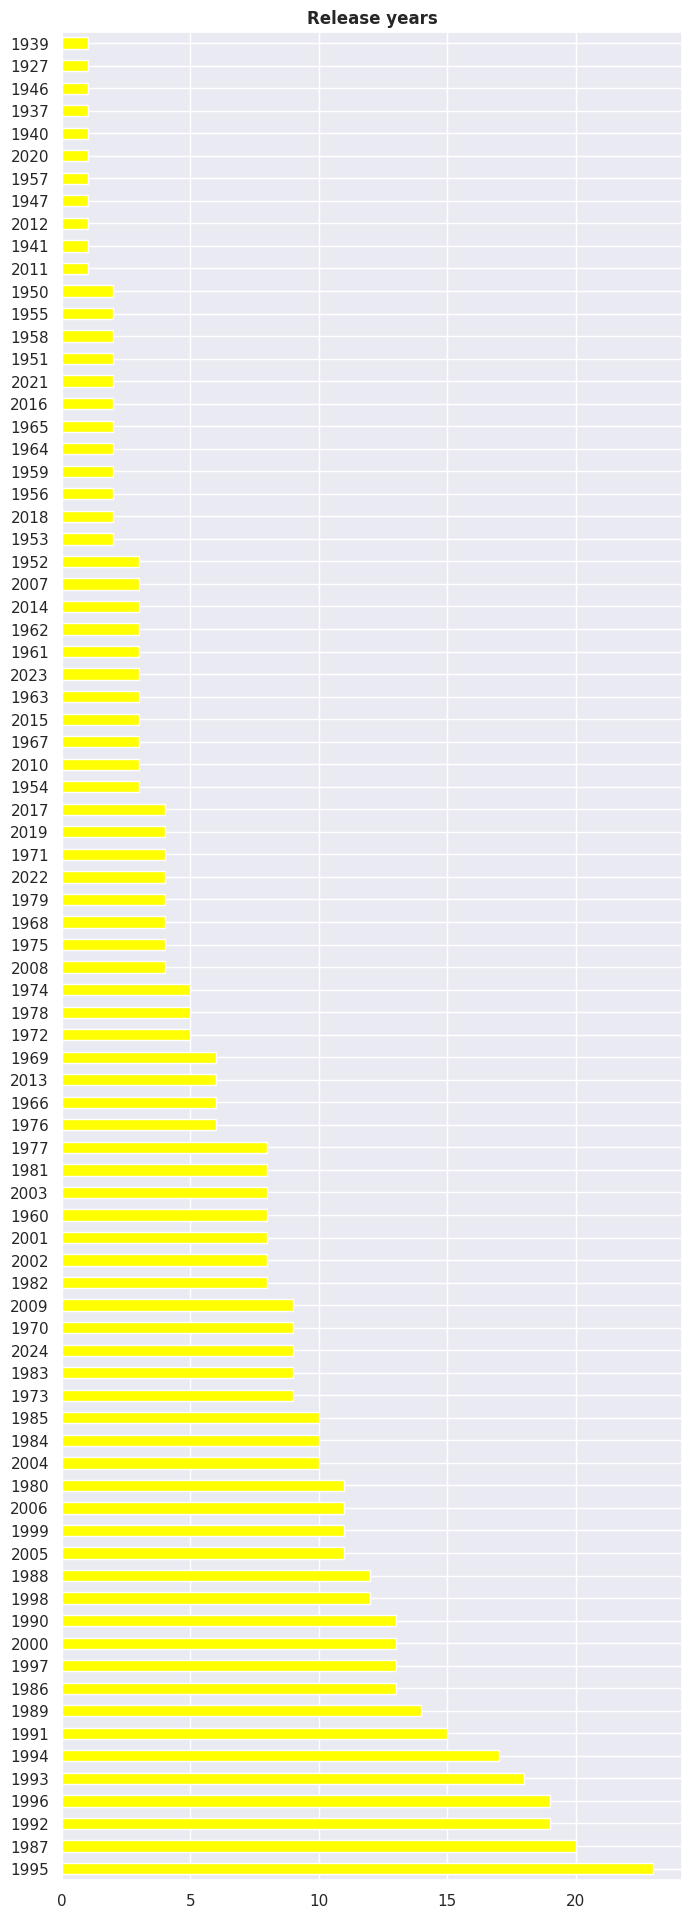

In [15]:
# Displaying distibution of release years in the dataset:
wl['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

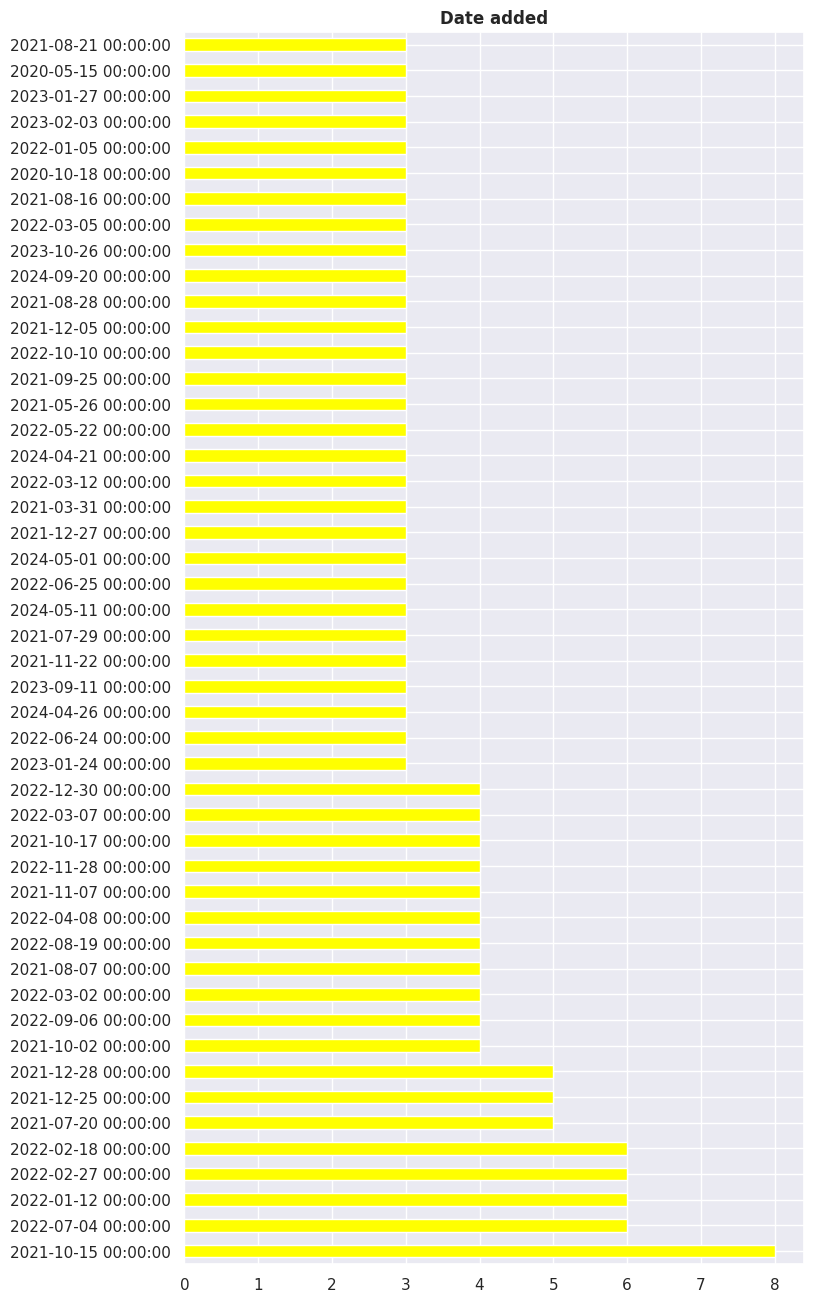

In [16]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
filtered_wl = wl.groupby('Created').filter(lambda x: len(x) > 2)

# Displaying dates with most additions:
filtered_wl['Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 16))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [17]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Decade'] = wl['Year'].apply(movies_by_decade)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade
0,2024-04-11,The Narrow Margin,Movie,7.6,71.0,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23 00:00:00,"Richard Fleischer, William Cameron Menzies",To watch with mom,11,4,2024,3,1950s
1,2024-04-18,Brian's Song,TV Movie,7.5,73.0,1971,"Biography, Drama, Sport",8869,1971-11-30 00:00:00,Buzz Kulik,"Available, but lacks subtitles in PT-BR",18,4,2024,3,1970s
2,2021-11-07,Cinderella,Movie,7.3,74.0,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15 00:00:00,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson",To watch by myself,7,11,2021,6,1950s
3,2021-11-26,Roots,TV Miniseries,8.4,74.0,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s
4,2022-10-30,When They See Us,TV Miniseries,8.8,75.0,2019,"Biography, Crime, Drama, History",137890,2019-05-31 00:00:00,NaN,Not classified,30,10,2022,6,2010s


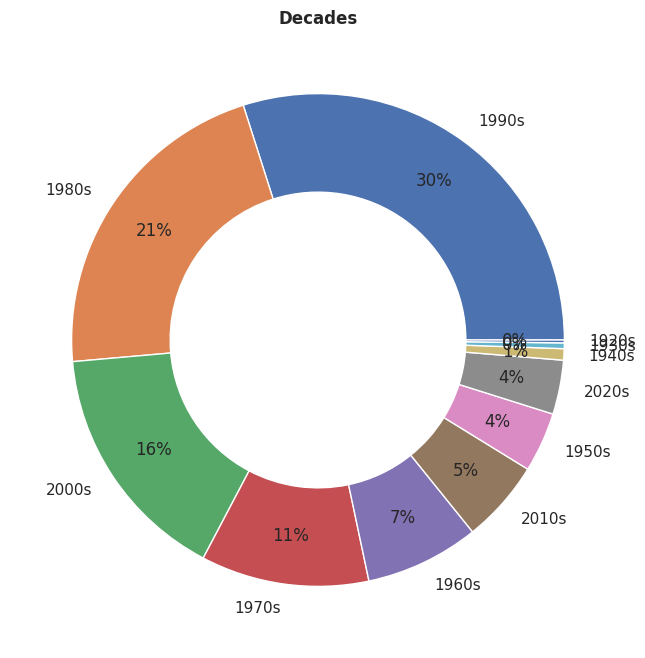

In [18]:
# Displaying the decades the movies are from:
wl['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [19]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quality'] = wl['IMDb Rating'].apply(imdb_rating)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality
0,2024-04-11,The Narrow Margin,Movie,7.6,71.0,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23 00:00:00,"Richard Fleischer, William Cameron Menzies",To watch with mom,11,4,2024,3,1950s,Good
1,2024-04-18,Brian's Song,TV Movie,7.5,73.0,1971,"Biography, Drama, Sport",8869,1971-11-30 00:00:00,Buzz Kulik,"Available, but lacks subtitles in PT-BR",18,4,2024,3,1970s,Good
2,2021-11-07,Cinderella,Movie,7.3,74.0,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15 00:00:00,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson",To watch by myself,7,11,2021,6,1950s,Good
3,2021-11-26,Roots,TV Miniseries,8.4,74.0,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing
4,2022-10-30,When They See Us,TV Miniseries,8.8,75.0,2019,"Biography, Crime, Drama, History",137890,2019-05-31 00:00:00,NaN,Not classified,30,10,2022,6,2010s,Amazing


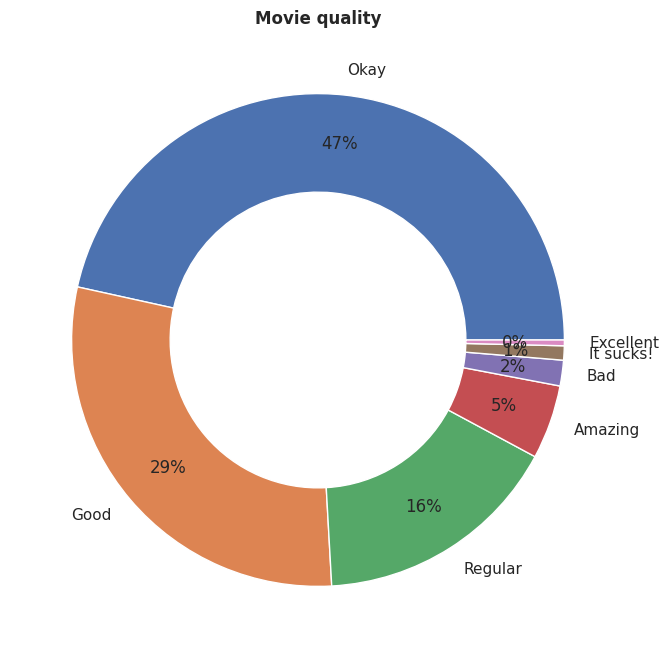

In [20]:
# Displaying the movie rating classification based on the algorithm above:
wl['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [21]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie popularity'] = wl['Num Votes'].apply(movie_popularity)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity
0,2024-04-11,The Narrow Margin,Movie,7.6,71.0,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23 00:00:00,"Richard Fleischer, William Cameron Menzies",To watch with mom,11,4,2024,3,1950s,Good,Less than 250k votes
1,2024-04-18,Brian's Song,TV Movie,7.5,73.0,1971,"Biography, Drama, Sport",8869,1971-11-30 00:00:00,Buzz Kulik,"Available, but lacks subtitles in PT-BR",18,4,2024,3,1970s,Good,Less than 250k votes
2,2021-11-07,Cinderella,Movie,7.3,74.0,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15 00:00:00,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson",To watch by myself,7,11,2021,6,1950s,Good,Less than 250k votes
3,2021-11-26,Roots,TV Miniseries,8.4,74.0,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing,Less than 250k votes
4,2022-10-30,When They See Us,TV Miniseries,8.8,75.0,2019,"Biography, Crime, Drama, History",137890,2019-05-31 00:00:00,NaN,Not classified,30,10,2022,6,2010s,Amazing,Less than 250k votes


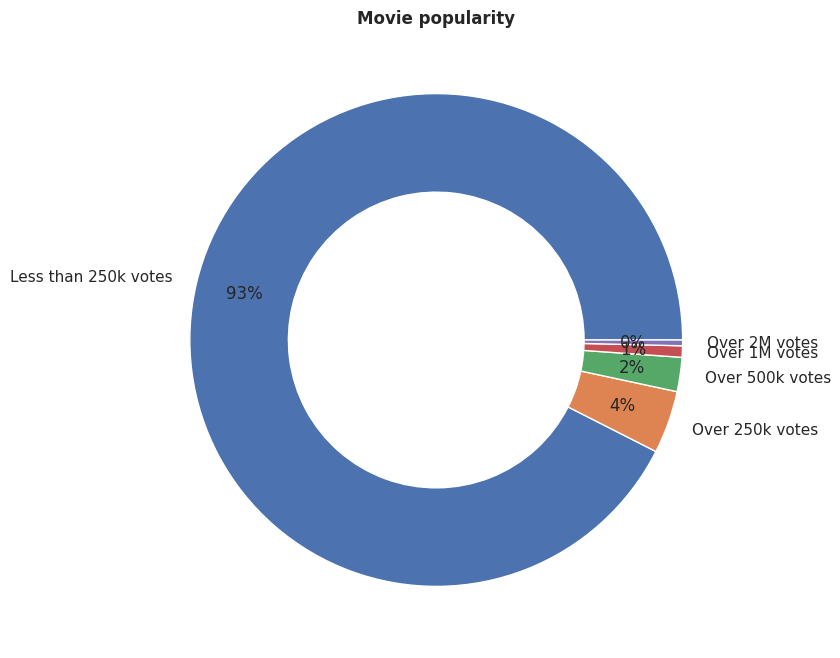

In [22]:
# Displaying the movie popularity based on the algorithm above:
wl['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [23]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie duration'] = wl['Runtime (mins)'].apply(movie_duration)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration
0,2024-04-11,The Narrow Margin,Movie,7.6,71.0,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23 00:00:00,"Richard Fleischer, William Cameron Menzies",To watch with mom,11,4,2024,3,1950s,Good,Less than 250k votes,Between 1h10 and 1h29
1,2024-04-18,Brian's Song,TV Movie,7.5,73.0,1971,"Biography, Drama, Sport",8869,1971-11-30 00:00:00,Buzz Kulik,"Available, but lacks subtitles in PT-BR",18,4,2024,3,1970s,Good,Less than 250k votes,Between 1h10 and 1h29
2,2021-11-07,Cinderella,Movie,7.3,74.0,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15 00:00:00,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson",To watch by myself,7,11,2021,6,1950s,Good,Less than 250k votes,Between 1h10 and 1h29
3,2021-11-26,Roots,TV Miniseries,8.4,74.0,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing,Less than 250k votes,Between 1h10 and 1h29
4,2022-10-30,When They See Us,TV Miniseries,8.8,75.0,2019,"Biography, Crime, Drama, History",137890,2019-05-31 00:00:00,NaN,Not classified,30,10,2022,6,2010s,Amazing,Less than 250k votes,Between 1h10 and 1h29


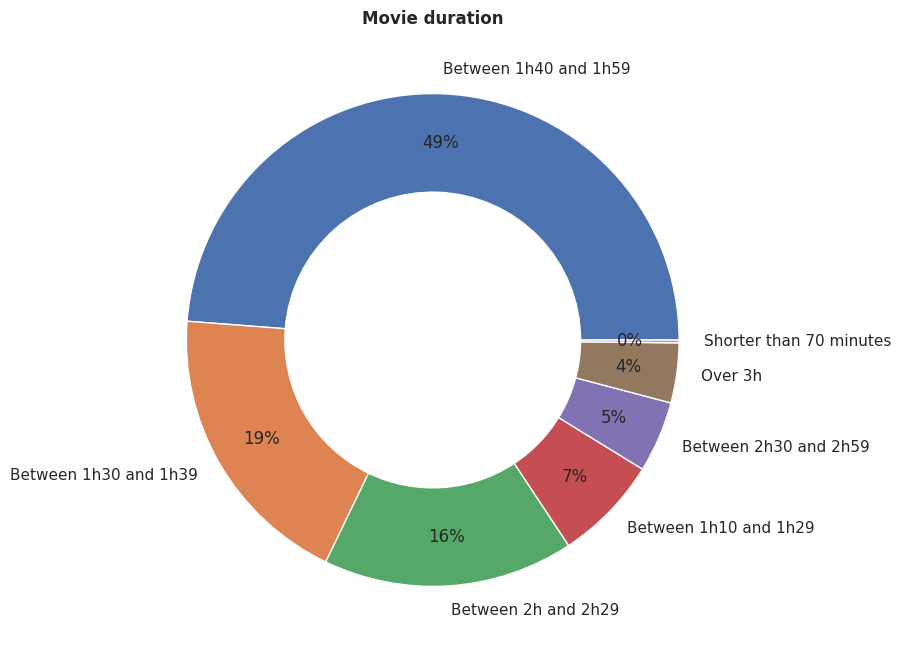

In [24]:
# Displaying the movie duration based on the algorithm above:
wl['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [25]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quartile Added'] = wl['Month Created'].apply(year_quartile)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added
0,2024-04-11,The Narrow Margin,Movie,7.6,71.0,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23 00:00:00,"Richard Fleischer, William Cameron Menzies",To watch with mom,11,4,2024,3,1950s,Good,Less than 250k votes,Between 1h10 and 1h29,Second
1,2024-04-18,Brian's Song,TV Movie,7.5,73.0,1971,"Biography, Drama, Sport",8869,1971-11-30 00:00:00,Buzz Kulik,"Available, but lacks subtitles in PT-BR",18,4,2024,3,1970s,Good,Less than 250k votes,Between 1h10 and 1h29,Second
2,2021-11-07,Cinderella,Movie,7.3,74.0,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15 00:00:00,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson",To watch by myself,7,11,2021,6,1950s,Good,Less than 250k votes,Between 1h10 and 1h29,Fourth
3,2021-11-26,Roots,TV Miniseries,8.4,74.0,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,To watch with mom,26,11,2021,4,1970s,Amazing,Less than 250k votes,Between 1h10 and 1h29,Fourth
4,2022-10-30,When They See Us,TV Miniseries,8.8,75.0,2019,"Biography, Crime, Drama, History",137890,2019-05-31 00:00:00,NaN,Not classified,30,10,2022,6,2010s,Amazing,Less than 250k votes,Between 1h10 and 1h29,Fourth


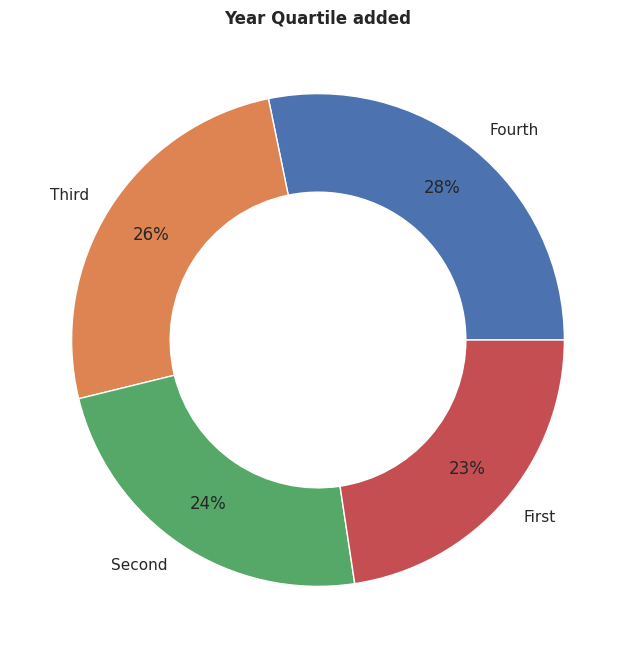

In [26]:
# Displaying the quartile the movie was added based on the algorithm above:
wl['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [27]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Month Half Added'] = wl['Day Created'].apply(month_half)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,...,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
0,2024-04-11,The Narrow Margin,Movie,7.6,71.0,1952,"Crime, Drama, Film-Noir, Thriller",8658,1952-04-23 00:00:00,"Richard Fleischer, William Cameron Menzies",...,11,4,2024,3,1950s,Good,Less than 250k votes,Between 1h10 and 1h29,Second,First
1,2024-04-18,Brian's Song,TV Movie,7.5,73.0,1971,"Biography, Drama, Sport",8869,1971-11-30 00:00:00,Buzz Kulik,...,18,4,2024,3,1970s,Good,Less than 250k votes,Between 1h10 and 1h29,Second,Second
2,2021-11-07,Cinderella,Movie,7.3,74.0,1950,"Animation, Family, Fantasy, Musical, Romance",174007,1950-02-15 00:00:00,"Hamilton Luske, Clyde Geronimi, Wilfred Jackson",...,7,11,2021,6,1950s,Good,Less than 250k votes,Between 1h10 and 1h29,Fourth,First
3,2021-11-26,Roots,TV Miniseries,8.4,74.0,1977,"Biography, Drama, History, War",18885,1977-01-23 00:00:00,NaN,...,26,11,2021,4,1970s,Amazing,Less than 250k votes,Between 1h10 and 1h29,Fourth,Second
4,2022-10-30,When They See Us,TV Miniseries,8.8,75.0,2019,"Biography, Crime, Drama, History",137890,2019-05-31 00:00:00,NaN,...,30,10,2022,6,2010s,Amazing,Less than 250k votes,Between 1h10 and 1h29,Fourth,Second


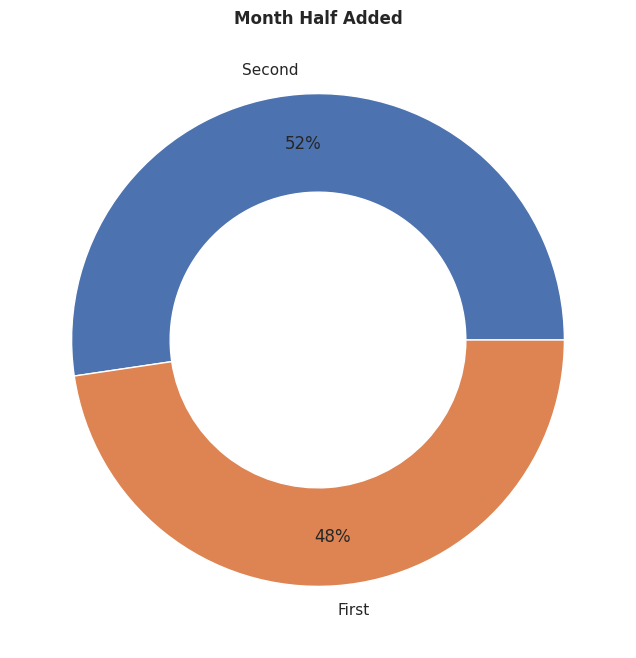

In [28]:
# Displaying the month half the movie was added based on the algorithm above:
wl['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [29]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
wl['Genres'] = wl['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = wl.index, columns = wl['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [30]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         453    82
Adventure      442    93
Animation      523    12
Biography      480    55
Comedy         342   193
Crime          433   102
Documentary    529     6
Drama          155   380
Family         470    65
Fantasy        491    44
Film-Noir      532     3
History        501    34
Horror         521    14
Music          512    23
Musical        519    16
Mystery        506    29
Romance        398   137
Sci-Fi         492    43
Sport          498    37
Thriller       453    82
War            493    42
Western        517    18


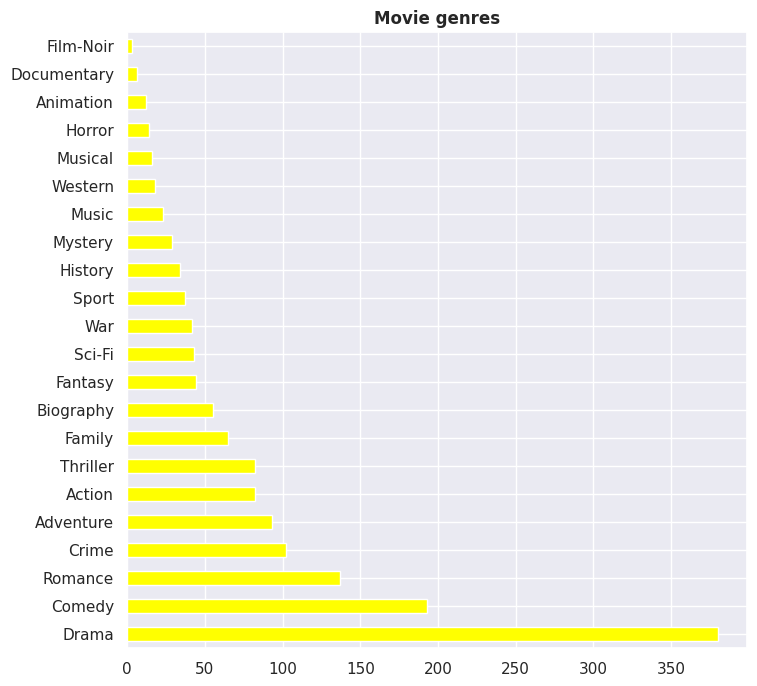

In [31]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [32]:
wl = wl[wl['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = wl.index, columns = wl['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-32-96bf50eac1cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [33]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                     False  True
Adrian Lyne            530     0
Alan Parker            530     0
Alan Shapiro           530     0
Albert Band            530     0
Albert Magnoli         530     0
...                    ...   ...
William Friedkin       530     0
William Wyler          530     0
Wolfgang Petersen      530     0
Wolfgang Reitherman    529     0
Zoltan Korda           530     1

[450 rows x 2 columns]


In [34]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
# Displaying dates with most additions:
dir = final_directors_counts['True'].filter(lambda x: len(x) > 2)
dir['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 16))
plt.ylabel(None)
plt.title('Movie directors', fontweight = 'bold')
plt.show()

TypeError: Index(...) must be called with a collection of some kind, <function <lambda> at 0x7d28fafc2170> was passed